In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

import warnings
warnings.filterwarnings('ignore')


### 1. Merge the available datasets and name the consolidated dataset – ‘Customer_Final’. Ensure to keep all the customers who have done transactions and select the join type accordingly.

In [24]:
customer =pd.read_csv(r'C:\Users\ASUS\Desktop\deepq 2\Case Study 1 - Retail\Customer.csv')

In [25]:
prod_info= pd.read_csv(r'C:\Users\ASUS\Desktop\deepq 2\Case Study 1 - Retail\Product Hierarchy.csv')

In [26]:
transactions= pd.read_csv(r'C:\Users\ASUS\Desktop\deepq 2\Case Study 1 - Retail\Transactions.csv')

In [27]:
transactions.rename(columns = {'Prod_sub_cat_code': 'prod_subcat_code'},inplace = True)
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [28]:

prod_concat = transactions.merge(prod_info, left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'], how ='left')
prod_concat.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY


In [29]:
prod_concat.rename(columns={'cust_id':'customer_Id'},inplace=True)


In [30]:
customer_final= prod_concat.merge(customer,on='customer_Id',how='left')
customer_final.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,27-07-1992,M,8.0


### 2a) Get the column names and their corresponding data types

In [31]:
customer_final.dtypes

transaction_id         int64
customer_Id            int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
DOB                   object
Gender                object
city_code            float64
dtype: object

### 2b) Top/Bottom 20 observations

In [68]:
customer_final.head(20)

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code,age
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,1981-09-26,M,5.0,44
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,5,Computers,1973-05-11,F,8.0,52
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,33
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,11,Bath,1981-06-08,M,3.0,44
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,33
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,8,Personal Appliances,1982-10-09,F,6.0,43
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,11,Bath,1981-05-29,M,9.0,44
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,12,Tools,1971-04-21,M,9.0,54
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,3,Kids,1971-11-04,F,8.0,54
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,8,Personal Appliances,1979-11-27,F,3.0,46


### 2c). Total no. of rows in the data

In [69]:
total_rows = customer_final.shape[0]
print("Total number of rows in the data:", total_rows)

Total number of rows in the data: 23053


### 2d). Total no. of missing in all the columns

In [71]:
missing_values_per_column = customer_final.isnull().sum()
total_missing_values = missing_values_per_column.sum()

missing_values_per_column

transaction_id       0
customer_Id          0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
DOB                  0
Gender               9
city_code            8
age                  0
dtype: int64

### 2d). “Five-Number summary” for continuous variables (Min, Max, Median, Q1, Q3)

In [74]:
customer_final.describe()

,transaction_id,customer_Id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code,city_code,age
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000,23053.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,6.149091,5.482534,43.966078
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,3.726372,2.863499,6.628164
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,1.000000,1.000000,33.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,3.000000,3.000000,38.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,5.000000,5.000000,44.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,10.000000,8.000000,50.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,12.000000,10.000000,55.000000


### 2e) Frequency tables for all the categorical variables

In [34]:
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,tran_date,Store_type,prod_cat,prod_subcat,DOB,Gender
count,23053,23053,23053,23053,23053,23044
unique,1129,4,6,18,3987,2
top,13-07-2011,e-Shop,Books,Women,27-12-1988,M
freq,35,9311,6069,3048,32,11811


### 2f) Frequency bars for categorical variables.

In [37]:
cat = customer_final.loc[:, (customer_final.dtypes=='object')]

In [38]:
cat.columns

Index(['tran_date', 'Store_type', 'prod_cat', 'prod_subcat', 'DOB', 'Gender'], dtype='object')

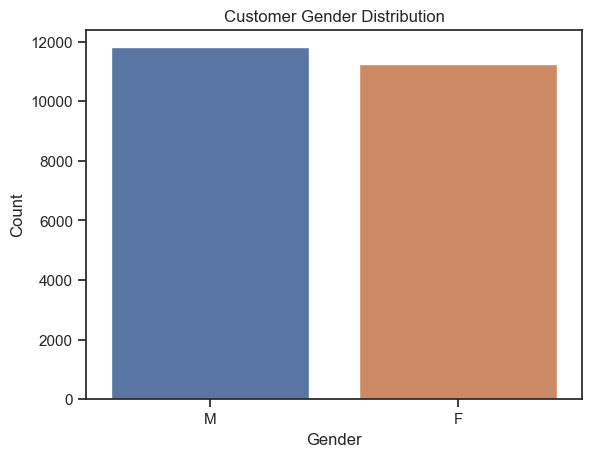

In [39]:
sns.countplot(x='Gender', data=customer_final)
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

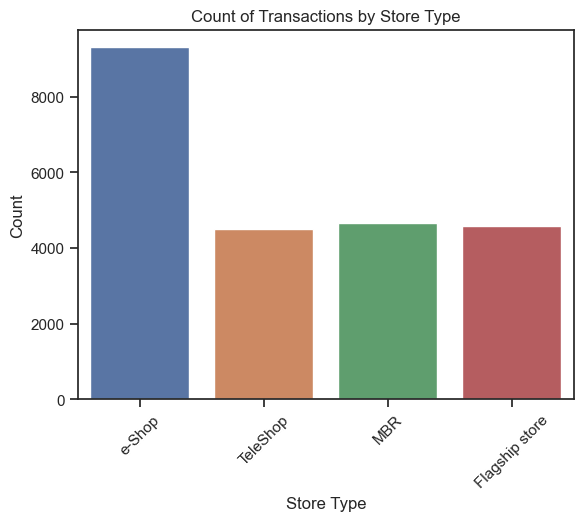

In [41]:
sns.countplot(x='Store_type', data=customer_final)
plt.title("Count of Transactions by Store Type")
plt.xlabel("Store Type")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Optional: Rotates labels if they are long
plt.show()

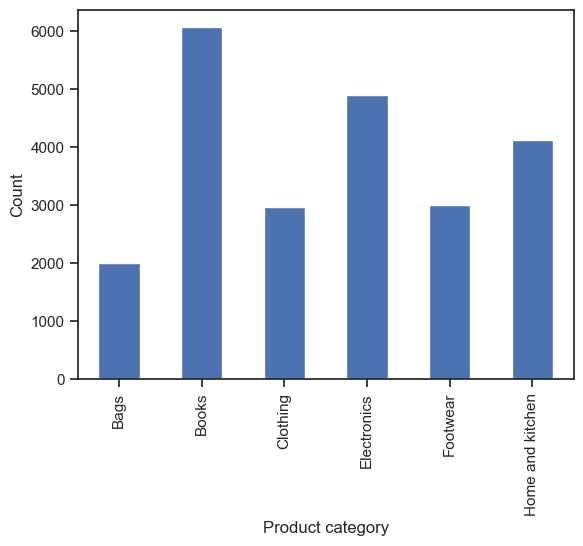

In [42]:

customer_final.groupby('prod_cat')['prod_cat'].count().plot(kind='bar')
plt.xlabel('Product category')
plt.ylabel('Count')
plt.show()

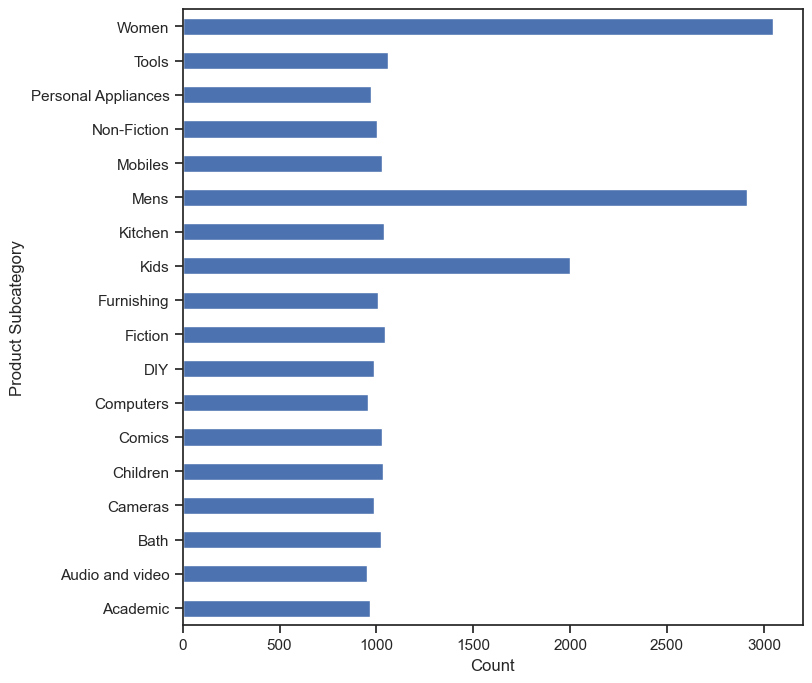

In [43]:
plt.figure(figsize=(8,8))
customer_final.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.xlabel('Count')
plt.ylabel('Product Subcategory')
plt.show()

### 3. a)Time period of the available transaction data

In [44]:
customer_final.dtypes

transaction_id         int64
customer_Id            int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
DOB                   object
Gender                object
city_code            float64
dtype: object

In [45]:

customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])
customer_final['tran_date']

0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23053, dtype: datetime64[ns]

In [46]:
customer_final.dtypes

transaction_id                int64
customer_Id                   int64
tran_date            datetime64[ns]
prod_subcat_code              int64
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
DOB                          object
Gender                       object
city_code                   float64
dtype: object

In [47]:
min_date = customer_final["tran_date"].min()
min_date

Timestamp('2011-01-02 00:00:00')

In [48]:
max_date = customer_final['tran_date'].max()
max_date

Timestamp('2014-12-02 00:00:00')

In [49]:
print('The time period is from '+ pd.Timestamp.strftime(min_date,format='%d-%m-%Y') +' to ' + pd.Timestamp.strftime(max_date,format='%d-%m-%Y'))
print()

The time period is from 02-01-2011 to 02-12-2014



### 3b) Count of transactions where the total amount of transaction was negative

In [50]:
negative_trans = len(customer_final[customer_final.total_amt<0].total_amt)
negative_trans

2177

### 4. Analyze which product categories are more popular among males vs female  customers.

In [51]:
count_cat = customer_final.groupby(['prod_cat', 'Gender'])['transaction_id'].count().reset_index()
count_cat.rename(columns = {'transaction_id':'count'}, inplace = True)
count_cat

,prod_cat,Gender,count
0,Bags,F,994
1,Bags,M,1004
2,Books,F,2949
3,Books,M,3116
4,Clothing,F,1439
5,Clothing,M,1518
6,Electronics,F,2328
7,Electronics,M,2570
8,Footwear,F,1529
9,Footwear,M,1469


In [52]:
max_tran = count_cat.groupby('prod_cat')['count'].max()
max_gender = count_cat.merge(max_tran, on='count', how='right')
max_gender

,prod_cat,Gender,count
0,Bags,M,1004
1,Books,M,3116
2,Clothing,M,1518
3,Electronics,M,2570
4,Footwear,F,1529
5,Home and kitchen,M,2134


### 5. Which city code has the maximum customers and what is the percentage of customers from that city?

In [83]:
city_customer_count = customer_final.groupby('city_code')['customer_Id'].nunique().reset_index()

max_city = city_customer_count.loc[city_customer_count['customer_Id'].idxmax()]

total_customers = customer_final['customer_Id'].nunique()

percentage = (max_city['customer_Id'] / total_customers) * 100

print(f"City with max customers: {max_city['city_code']}")
print(f"Number of customers: {max_city['customer_Id']}")
print(f"Percentage of total customers: {percentage:.2f}%")

City with max customers: 3.0
Number of customers: 576.0
Percentage of total customers: 10.46%


### 6. Which store type sells the maximum products by value and by quantity?

In [55]:
# Quantity wise maximum product
quantity = customer_final.groupby('Store_type')['Qty'].sum().reset_index()
quantity
quantity[quantity.Qty == quantity.Qty .max()]

,Store_type,Qty
3,e-Shop,22763


In [56]:
#amount wise maximum product
value = customer_final.groupby('Store_type')['total_amt'].sum().reset_index()
value
value[value.total_amt == value.total_amt.max()]

,Store_type,total_amt
3,e-Shop,19824816.05


### 7. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [57]:
category = customer_final.groupby(['Store_type', 'prod_cat'])['total_amt'].sum().reset_index()
flagship = category[category.Store_type == 'Flagship store']    
Electronic_clothes = flagship[(flagship.prod_cat == 'Electronics') | (flagship.prod_cat == 'Clothing')]
Electronic_clothes

,Store_type,prod_cat,total_amt
2,Flagship store,Clothing,1194423.23
3,Flagship store,Electronics,2215136.04


### 8. What was the total amount earned from "Male" customers under the "Electronics" category?

In [58]:
sale_male = customer_final.groupby(['prod_cat', 'Gender'])['total_amt'].sum().reset_index()
sale_male[(sale_male.prod_cat=="Electronics") & (sale_male.Gender=="M")]

,prod_cat,Gender,total_amt
7,Electronics,M,5703109.425


### 9. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [59]:
postive_trans = customer_final[customer_final.total_amt>0].reset_index(drop=True)
postive_trans

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code
0,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,5,Computers,11-05-1973,F,8.0
1,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,12,Tools,13-10-1986,M,1.0
2,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,6,DIY,09-03-1971,M,6.0
3,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,3,Comics,26-06-1970,F,10.0
4,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,7,Fiction,27-06-1979,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20871,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,12,Academic,21-02-1972,M,7.0
20872,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,4,Mens,27-04-1984,M,9.0
20873,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,2,Furnishing,20-06-1976,M,8.0
20874,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,11,Children,22-05-1970,M,2.0


In [60]:
transaction_count = postive_trans.groupby('customer_Id')['transaction_id'].count().reset_index()
transaction_count[transaction_count.transaction_id>10]

,customer_Id,transaction_id
4,266794,11
2426,270535,11
2606,270803,11
3867,272741,11
4032,273014,11
4815,274227,11


###  Count of transactions where the total amount of transaction was negative

In [61]:
negative_trans = customer_final.loc[customer_final["total_amt"] < 0,"transaction_id"].count()
print('Total negative transacatios:',negative_trans)

Total negative transacatios: 2177


## 10. For all customers aged between 25 - 35, find out the following:



In [62]:
# Converting DOB to datetime

customer_final.DOB = pd.to_datetime(customer_final.DOB, format = "%d-%m-%Y")
DOB = customer_final.DOB

# Finding age of each individual
customer_final['age'] = DOB.apply(lambda x: pd.to_datetime('today').year-x.year)

# Clipping age betwen 25-35
age_barred = customer_final[(customer_final.age>=25) & (customer_final.age<=35)].reset_index(drop=True)
age_barred.head()

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code,age
0,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,33
1,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,33
2,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,4,Women,1992-01-02,F,6.0,33
3,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,3,Women,1992-02-06,F,10.0,33
4,83313344780,271288,2014-02-18,4,3,2,84,17.640,185.640,Flagship store,Electronics,4,Mobiles,1991-02-25,F,3.0,34


### a) What was the total amount spent for “Electronics” and “Books” product categories?


In [63]:
age_catg = age_barred.groupby('prod_cat')['total_amt'].sum().reset_index()
age_catg


,prod_cat,total_amt
0,Bags,499296.460
1,Books,1544727.015
2,Clothing,838613.230
3,Electronics,1249813.565
4,Footwear,786189.820
5,Home and kitchen,1074441.225


In [64]:
age_catg[(age_catg.prod_cat=='Electronics') | (age_catg.prod_cat=='Books')]

,prod_cat,total_amt
1,Books,1544727.015
3,Electronics,1249813.565


### b) What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [65]:
age_barred.tran_date = pd.to_datetime(age_barred.tran_date, format='%d-%m-%Y')
date_barred = age_barred[(age_barred.tran_date > pd.to_datetime('01-01-2014', format='%d-%m-%Y')) & (age_barred.tran_date<pd.to_datetime('01-03-2014', format='%d-%m-%Y'))].reset_index(drop=True)
date_barred

,transaction_id,customer_Id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,DOB,Gender,city_code,age
0,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,33
1,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,6,DIY,1992-07-27,M,8.0,33
2,88853694830,268444,2014-02-20,4,4,-3,-80,25.200,-265.200,MBR,Bags,4,Women,1992-01-02,F,6.0,33
3,31384765864,267058,2014-02-19,3,2,1,793,83.265,876.265,e-Shop,Footwear,3,Women,1992-02-06,F,10.0,33
4,83313344780,271288,2014-02-18,4,3,2,84,17.640,185.640,Flagship store,Electronics,4,Mobiles,1991-02-25,F,3.0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,69724469724,271352,2014-01-14,4,4,1,861,90.405,951.405,MBR,Bags,4,Women,1992-07-18,M,8.0,33
71,8225949147,267978,2014-01-13,4,1,1,316,33.180,349.180,Flagship store,Clothing,4,Mens,1992-08-10,M,6.0,33
72,95974831788,274618,2014-01-13,1,1,4,561,235.620,2479.620,Flagship store,Clothing,1,Women,1992-12-09,F,7.0,33
73,32899104170,270064,2014-02-01,2,6,3,802,252.630,2658.630,TeleShop,Home and kitchen,2,Furnishing,1990-02-22,F,3.0,35


In [66]:
date_barred.total_amt.sum()

179287.355